# Importing all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# loading  Rossmann Pharmaceuticals Datasets

In [ ]:
# Read the CSV file into a pandas DataFrame
Sales_data = pd.read_csv(r"/content/store.csv")

In [ ]:
# Read the CSV file into a pandas DataFrame
Sales_test = pd.read_csv(r"/content/test.csv")

In [ ]:
# Read the CSV file into a pandas DataFrame
Sales_train= pd.read_csv(r"/content/train.csv")

# Merge store data with train data

In [ ]:
merge_train=pd.merge(Sales_train,Sales_data,on='Store')
merge_test=pd.merge(Sales_test,Sales_data,on='Store')

In [ ]:
merge_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# Insights of data information:
1. **Large Dataset with Missing Values**: `CompetitionDistance`, `CompetitionOpenSinceMonth/Year`, and `Promo2SinceWeek/Year` have missing values, especially related to promotions and competition. This could affect models or analysis relying on complete data.

2. **Temporal and Categorical Richness**: Columns like `Date`, `DayOfWeek`, `StoreType`, `Assortment`, and `StateHoliday` suggest you have a strong base for time-series and categorical trend analysis—perfect for sales forecasting and promotional impact studies.

3. **Promotion and Sales Dynamics**: With columns like `Promo`, `Promo2`, and their respective timelines, along with `Sales` and `Customers`

In [ ]:
merge_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


# Insights of summary:

1. **Sales and Customers**:  
   - On average, each store makes around 5,774 in sales, but some days go way higher—up to 41,551.  
   - A typical store sees about 609 customers a day, though some see over 7,000.

2. **Store Openings and Promotions**:  
   - Stores are open most of the time (83% of records).  
   - Only 38% use Promo1 and half use Promo2, so promotions aren't always active.

3. **Competition**:  
   - Nearby competitors range from right next door (20 meters) to really far (75 km).  
   - Many stores don’t have info on when their competition started, and some of the data might be placeholders (like the year 1900).


In [ ]:
merge_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [ ]:
merge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

# Insights of dataset:

1. **Mostly Complete Data**: Most columns have no missing values. Only a few like `Open`, `CompetitionDistance`, and some competition/promo-related columns have missing entries.

2. **Missing Open Values**: Just 11 rows are missing the `Open` value, so it’s a small gap that can be easily filled with a default (like 1 or using forward fill).

3. **Competition and Promo2 Gaps**:  
   - Around **37% of rows** are missing competition start info.  
   - About **42% are missing Promo2 timeline data**, which suggests not all stores participate in this promotion.

4. **Good for Predictions**: With the right filling strategy, this dataset is mostly ready for forecasting tasks like predicting store sales.


In [ ]:
merge_test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [ ]:
# Fill CompetitionDistance with a large value
merge_test['CompetitionDistance'].fillna(merge_test['CompetitionDistance'].max(), inplace=True)

# Fill missing Competition open month/year with 0
merge_test['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
merge_test['CompetitionOpenSinceYear'].fillna(0, inplace=True)
merge_test['Open'].fillna(0, inplace=True)
# Fill missing Promo2 values
merge_test['Promo2SinceWeek'].fillna(0, inplace=True)
merge_test['Promo2SinceYear'].fillna(0, inplace=True)
merge_test['PromoInterval'].fillna('None', inplace=True)


# Insights of Missing data:

1. **Minimal Missing Data Overall**: Most key columns like `Sales`, `Customers`, `Open`, and `Promo` are complete. The only missing values appear in columns related to competition and promotional timelines.

2. **Competition Data Handling**:  
   - You chose to fill missing `CompetitionDistance` with the **maximum observed value**. This treats unknown distances as if competitors are very far away, which helps avoid underestimating their influence in models.  
   - Missing values in `CompetitionOpenSinceMonth/Year` are filled with **0**, likely representing stores with **no known competition start date**.

3. **Promo2 Strategy**:  
   - All missing values in `Promo2SinceWeek/Year` and `PromoInterval` were filled with `0` or `'None'`. This approach implies that for those entries, **Promo2 was not active**, simplifying model inputs by avoiding NaNs.


In [ ]:
merge_test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


All missing values are imputated

In [ ]:
merge_test.duplicated().sum()

np.int64(0)

No duplicates in data

In [ ]:
#Store Type and Sales Exploration
store_type = merge_train.groupby("StoreType")[["Sales","Customers"]].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True)
# sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


Insights of store type:

1. **Store Type 'a' is the Top Performer**  
   - It generated the **highest total sales** (over 3.1 billion) and **attracted the most customers** (around 364 million). This suggests 'a' stores might be larger, more popular, or located in high-traffic areas.

2. **Store Type 'd' Comes Second**  
   - With nearly **1.77 billion in sales** and **over 156 million customers**, 'd' stores also perform strongly—though still far behind type 'a'.

3. **Types 'c' and 'b' Trail Behind**  
   - Type 'c' stores have moderate sales and customer volume.  
   - Type 'b' stores show the **lowest sales and footfall**, indicating they might be smaller or niche-oriented.

4. **Potential for Targeted Strategy**  
   - These insights can help tailor marketing or operational strategies—like boosting visibility for underperforming store types or analyzing what makes type 'a' so effective.



#let's explore store types and it's influence on sales

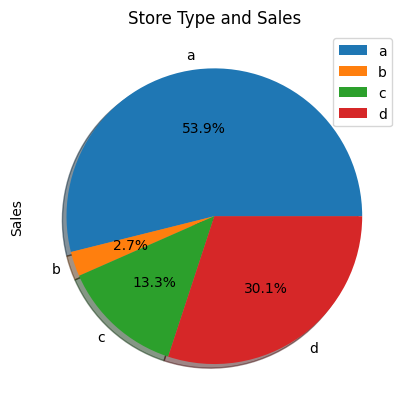

In [ ]:
merge_train.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

# Insights of  *"Store Type and Sales"*:

1. **Store type "a" is the dominant performer**, contributing **53.9%** of total sales. This suggests it plays a crucial role in the overall revenue and might be the flagship model or format.

2. **Store type "d" follows with 30.1%**, making it a significant but secondary contributor. There may be growth opportunities here, especially if operational efficiency or customer reach can be improved.

3. **Store types "b" and "c" lag behind**, with **2.7%** and **13.3%** respectively. This could indicate niche functions, underperformance, or perhaps pilot programs that haven't scaled.

4. **Strategic focus should likely prioritize types "a" and "d"**, as they collectively generate over 80% of sales. However, analyzing the potential for "c" and the reason for "b"'s low share could uncover hidden opportunities or the need for restructuring.



#customers and store type

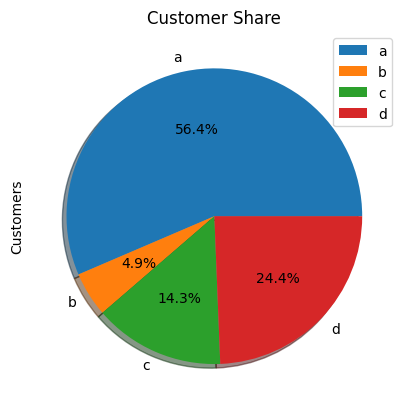

In [ ]:
merge_train.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

# Insights of *"Customer Share"*:

1. **Category "a" has the most customers**, making up **56.4%**  more than half of all customers belong to this group.

2. **Category "d" comes next with 24.4%**, smaller than category "a".

3. **Category "c" holds 14.3%**, showing a smaller but still notable portion of the customer base.

4. **Category "b" has the least customers—only 4.9%**. This could be a group that's either very niche or underperforming.

#store types in all of the dataset

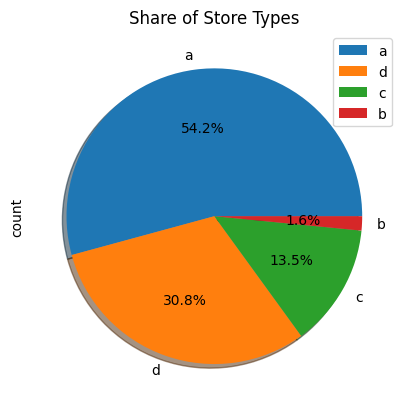

In [ ]:
merge_train["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

# Insight:
- Types "a" and "d" **dominate the store network**, making up over **85%** combined.
 - Any decisions around resource allocation, marketing focus, or operational upgrades should prioritize these two types.
 -  the minimal share of "b" could signal a need to reassess its role—whether it's worth improving, repurposing, or replacing.



In [ ]:
assortment_sales = merge_train.groupby('Assortment')[['Sales']].mean()
assortment_sales

,Sales
Assortment,
a,5481.026096
b,8553.931999
c,6058.676567


<Axes: xlabel='Assortment', ylabel='Sales'>

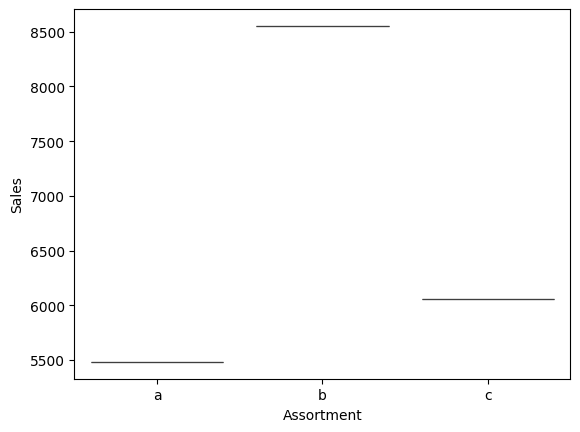

In [ ]:
sns.boxenplot(x=assortment_sales.index,y=assortment_sales['Sales'])

# Insights  *Assortment and Sales* data:

- The gap between **"b" and the others is significant**, suggesting it's not just slightly better—it’s clearly outpacing the rest. That could signal where to invest more resources or expand availability.
- Since **"a" is both lowest in sales and common across stores** (based on earlier charts), there might be untapped potential if its performance can be boosted—possibly by learning what works in assortment "b".


# How does the distance to the next competitor affect sales?
#What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [ ]:
competitor= merge_train.groupby('CompetitionDistance')[['Sales']].mean()
competitor

,Sales
CompetitionDistance,
20.0,4861.790870
30.0,4659.587470
40.0,6212.659448
50.0,8072.697452
60.0,7816.121373
...,...
45740.0,6646.681529
46590.0,3773.877919
48330.0,4032.547771


# Insights based on the relationship between **Competition Distance** and **Sales**:

- There’s **no simple linear pattern**—distance from competitors influences sales, but it’s mixed with other factors like store type, location, and customer base.
- The sweet spot might be **moderate distances**, avoiding both extreme proximity and isolation.


#  Filtering stores located in city centers (Assumption: CompetitionDistance ≤ 1000)

In [ ]:
city_center_stores = merge_train[merge_train["CompetitionDistance"] <= 1000]

correlation = city_center_stores["CompetitionDistance"].corr(city_center_stores["Sales"])

sales_by_distance = city_center_stores.groupby("CompetitionDistance")["Sales"].mean().reset_index()

print(sales_by_distance.head(10))


   CompetitionDistance        Sales
0                 20.0  4861.790870
1                 30.0  4659.587470
2                 40.0  6212.659448
3                 50.0  8072.697452
4                 60.0  7816.121373
5                 70.0  6667.511268
6                 80.0  5269.674098
7                 90.0  7494.269184
8                100.0  5271.668790
9                110.0  5800.739576


# Insights **Competition Distance vs. Sales** data:

1. **Sales tend to rise as the distance increases—from 20m to 50m**, peaking at **8072.7 at 50m**. This suggests that stores slightly farther from competitors may benefit from reduced competition while still attracting shared foot traffic.

2. **After 50m, there’s a mixed trend**:
   - Sales **remain strong at 60m and 90m**, both above **7400**.
   - But at **80m and 100m**, sales drop significantly (~5270), showing that **increased distance doesn't always mean higher sales**.

3. **Very short distances (20m–30m) show the lowest performance**, both under **4900**, possibly due to intense competition impacting margins or customer choices.


In [ ]:
correlation = city_center_stores["CompetitionDistance"].corr(city_center_stores["Sales"])
correlation


np.float64(-0.08861236343365786)

A small negative value like this might suggest a weak negative relationship or impact.

# How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

#new_competitor_affect

In [ ]:
new_competitor_affect=merge_train.groupby('CompetitionOpenSinceYear')[['Sales']].mean()


In [ ]:
#CompetitionOpenSinceMonth
new_competitor_affect=merge_train.groupby('CompetitionOpenSinceMonth')[['Sales']].mean()

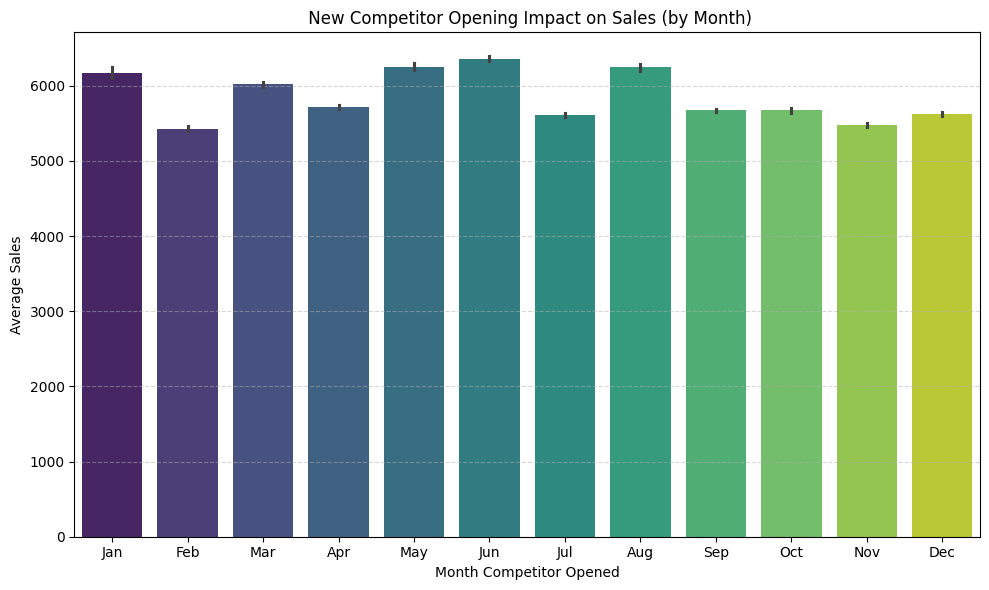

In [ ]:
# Create mapping from month number to name (optional)
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
merge_train['CompOpenMonthName'] = merge_train['CompetitionOpenSinceMonth'].map(month_names)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=merge_train,
            x='CompOpenMonthName',
            y='Sales',
            order=list(month_names.values()),  # Ensures correct month order
            palette='viridis')

plt.title(' New Competitor Opening Impact on Sales (by Month)')
plt.xlabel('Month Competitor Opened')
plt.ylabel('Average Sales')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Insights "New Competitor Opening Impact on Sales (by Month)":

1. **January has the highest average sales**, suggesting that when a competitor opens in January, the impact on existing store sales is minimal—or possibly even positive. This could be due to seasonal demand or promotional overlaps.

2. **Sales gradually decline from January to September**, where **September hits the lowest average sales**. This might indicate that new competitors entering the market in late summer or early fall have a stronger negative effect on performance.

3. **After September, there is a mild recovery in sales through December**, possibly due to end-of-year shopping or festive season effects softening the competitive pressure.


- **Timing matters**: The month a competitor opens can significantly affect sales trends. Openings in **Q1 tend to be less disruptive**, while **Q3 is the most vulnerable period**.


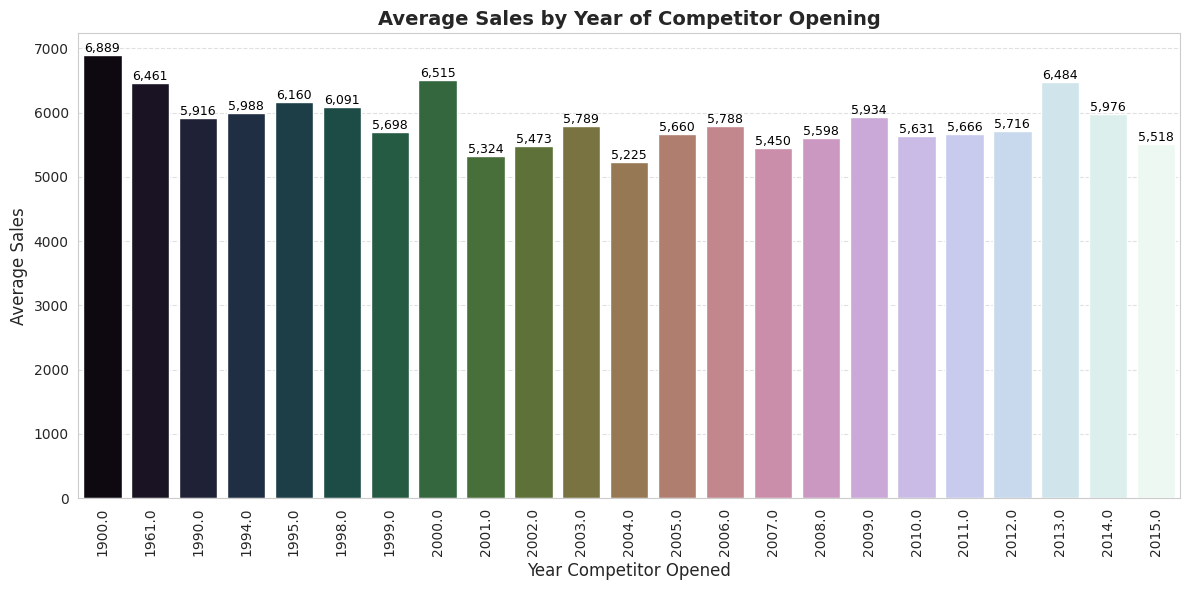

In [ ]:
# Group by year and calculate average sales
merge_train_sorted = merge_train.groupby('CompetitionOpenSinceYear', as_index=False)['Sales'].mean().sort_values('CompetitionOpenSinceYear')

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=merge_train_sorted,
    x='CompetitionOpenSinceYear',
    y='Sales',
    palette='cubehelix',
    errorbar='se'
)

# Annotate bars with average sales value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

# Titles and labels
plt.title('Average Sales by Year of Competitor Opening', fontsize=14, fontweight='bold')
plt.xlabel('Year Competitor Opened', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# The chart shows how average sales vary based on the year a competitor opened nearby.

- **Early openings (1900–1950)** seem to correlate with higher average sales, peaking at **6,889** in 1900.
- The **lowest point** is in 2003, with an average sale of **5,225**, suggesting newer competitors might impact revenue more adversely.
- There’s a slight resurgence in recent years—2012 shows a bump to **6,484**, one of the higher points post-2000.

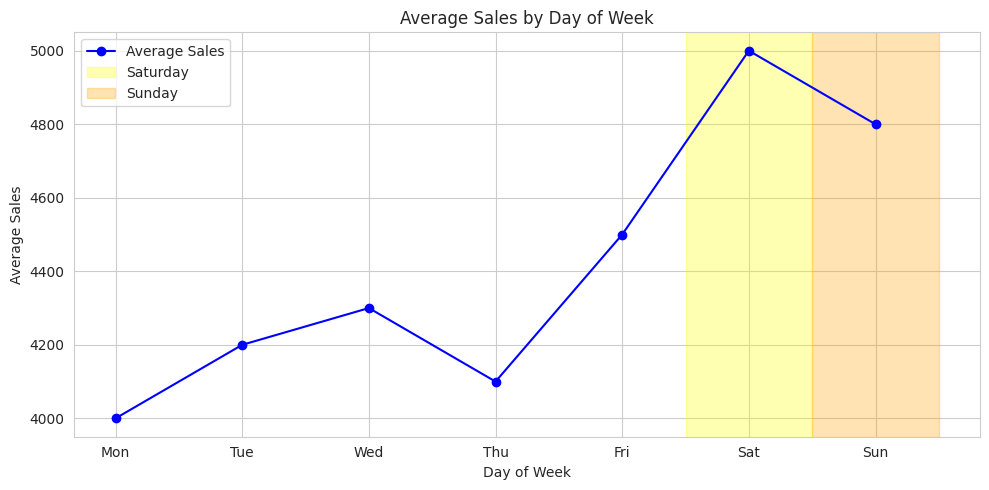

In [ ]:
import matplotlib.pyplot as plt

# Sample average sales data (replace with your actual values)
average_sales = [4000, 4200, 4300, 4100, 4500, 5000, 4800]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(range(7), average_sales, marker='o', linestyle='-', color='blue', label='Average Sales')

# Highlight Saturday and Sunday using axvspan
plt.axvspan(4.5, 5.5, color='yellow', alpha=0.3, label='Saturday')
plt.axvspan(5.5, 6.5, color='orange', alpha=0.3, label='Sunday')

# Labels and title
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Show legend only once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
plt.legend(by_label.values(), by_label.keys())

plt.grid(True)
plt.tight_layout()
plt.show()


# Insights of Average sales by day:

- **Saturday** stands out as the peak day, hitting around **5000** in average sales—possibly driven by weekend shopping sprees.
- **Monday** is the lowest point at **4000**, with gradual growth midweek, a dip on **Thursday**, and then an upswing heading into the weekend.
- The colored highlights emphasize weekend behavior—**yellow for Saturday’s high** and **orange for Sunday’s slight dip**, which might suggest lighter traffic after the Saturday surge.


# logging file

In [ ]:
import logging

# Configure the basic settings for logging
logging.basicConfig(
    filename='log_file.log',
    format='%(asctime)s | %(levelname)-7s | %(message)s',
    filemode='a'  # Append mode
)

# Get the default logger
logger = logging.getLogger()

# Set the logging level
logger.setLevel(logging.DEBUG)

# Example log messages
logger.debug("debug Message")
logger.info("log code information")
logger.warning("warning message")
logger.error("error message")
logger.critical("critical message")


DEBUG:root:debug Message
INFO:root:log code information
ERROR:root:error message
CRITICAL:root:critical message


# Task 2 - Prediction of store sales

In [ ]:
from datetime import datetime


holiday_date = datetime(2025, 6, 10)

# Get today's date
today = datetime.today()

# Calculate the difference
days_until_holiday = (holiday_date - today).days

# Print the result
print(f"Days until holiday: {days_until_holiday}")



Days until holiday: -15


#  Datetime columns to preprocess

In [ ]:
from datetime import datetime

# List of holidays in 2025
holidays = [
    {"name": "Independence Day", "date": datetime(2025, 8, 15)},
    {"name": "Thanksgiving", "date": datetime(2025, 11, 27)},
    {"name": "Christmas", "date": datetime(2025, 12, 25)},
]

# Get today's date (remove time part for accurate comparison)
today = datetime.today().date()

# Filter holidays that are in the future
future_holidays = [h for h in holidays if h["date"].date() > today]

# Find the next upcoming holiday
upcoming_holiday = min(future_holidays, key=lambda x: x["date"], default=None)

# Display result
if upcoming_holiday:
    days_left = (upcoming_holiday["date"].date() - today).days
    print(f"The next holiday is {upcoming_holiday['name']} in {days_left} days.")
else:
    print("No upcoming holidays this year.")


The next holiday is Independence Day in 52 days.


In [ ]:
from datetime import datetime

holiday_date = datetime(2024, 12, 25)

# Get today's date
today = datetime.today()

# Calculate the difference
days_after_holiday = (today - holiday_date).days

# Print the result
if days_after_holiday >= 0:
    print(f"{days_after_holiday} days have passed since the holiday.")
else:
    print(f"The holiday is in {-days_after_holiday} days.")


181 days have passed since the holiday.


# Beginning of month, mid month and ending of month

In [ ]:
from datetime import datetime
import calendar

# Get today's date
today = datetime.today()
year, month = today.year, today.month

# Beginning of the month
beginning_of_month = datetime(year, month, 1)

# End of the month
last_day = calendar.monthrange(year, month)[1]
end_of_month = datetime(year, month, last_day)

# Mid of the month (more accurate)
mid_day = (last_day + 1) // 2
mid_of_month = datetime(year, month, mid_day)

# Print the results
print(f"Beginning of Month: {beginning_of_month.strftime('%Y-%m-%d')}")
print(f"Mid of Month: {mid_of_month.strftime('%Y-%m-%d')}")
print(f"End of Month: {end_of_month.strftime('%Y-%m-%d')}")


Beginning of Month: 2025-06-01
Mid of Month: 2025-06-15
End of Month: 2025-06-30


# Categorical_cols

In [ ]:
categorical_columns=merge_train.select_dtypes(include='object')
categorical_columns.head(4)


,Date,StateHoliday,StoreType,Assortment,PromoInterval,CompOpenMonthName
0,2015-07-31,0,c,a,NaN,Sep
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct",Nov
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct",Dec
3,2015-07-31,0,c,c,NaN,Sep


# Numerical_cols

In [ ]:
numerical_columns=merge_train.select_dtypes(exclude='object')
numerical_columns.head(4)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN


# changing dtype

In [ ]:
merge_train['StateHoliday'] = merge_train['StateHoliday'].astype(str)
merge_train['StoreType'] = merge_train['StoreType'].astype(str)
merge_train['Assortment'] = merge_train['Assortment'].astype(str)
merge_train['PromoInterval'] = merge_train['PromoInterval'].astype(str)
merge_train['CompOpenMonthName'] = merge_train['CompOpenMonthName'].astype(str)


In [ ]:
import datetime as dt

# Convert the 'Date' column to datetime objects, coercing errors
merge_train['Date'] = pd.to_datetime(merge_train['Date'], errors='coerce')

# Drop rows with invalid dates (NaT)
merge_train.dropna(subset=['Date'], inplace=True)

# Convert the datetime objects to ordinal
merge_train['Date'] = merge_train['Date'].map(dt.datetime.toordinal)

In [ ]:
# Drop the original 'Date' column
merge_train = merge_train.drop('Date', axis=1)

In [ ]:
import calendar

# Create mapping from month name to number
month_map = {month: index for index, month in enumerate(calendar.month_abbr) if month}
# {'Jan': 1, 'Feb': 2, ..., 'Dec': 12}

# Map month names to numbers
merge_train['CompOpenMonth'] = merge_train['CompOpenMonthName'].map(month_map)


In [ ]:
s = (merge_train.dtypes == 'object')
object_cols = list(s[s].index)
print('catogorical Variables: ')
print(object_cols)
print('no.of catogorical Variables:',len(object_cols))

catogorical Variables: 
['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval', 'CompOpenMonthName']
no.of catogorical Variables: 5


In [ ]:
merge_train = merge_train.drop([ 'CompOpenMonth'], axis=1)

# All columns converted into Numerical dtypes:

In [ ]:
import pandas as pd

merge_train_encoded = merge_train.copy()

# Step 1: Identify all columns with the 'object' data type
object_cols = merge_train_encoded.select_dtypes(include='object').columns

# Step 2: Loop through each object column and apply factorization
for col in object_cols:

    merge_train_encoded[col], _ = pd.factorize(merge_train_encoded[col])

print("Data types after conversion:")
print(merge_train_encoded.info())

print("\nDataFrame head after converting object columns to numbers:")
display(merge_train_encoded.head())

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  int64  
 9   Assortment                 1017209 non-null  int64  
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-nul

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompOpenMonthName
0,1,5,5263,555,1,1,0,1,0,0,1270.0,9.0,2008.0,0,NaN,NaN,0,0
1,2,5,6064,625,1,1,0,1,1,0,570.0,11.0,2007.0,1,13.0,2010.0,1,1
2,3,5,8314,821,1,1,0,1,1,0,14130.0,12.0,2006.0,1,14.0,2011.0,1,2
3,4,5,13995,1498,1,1,0,1,0,1,620.0,9.0,2009.0,0,NaN,NaN,0,0
4,5,5,4822,559,1,1,0,1,1,0,29910.0,4.0,2015.0,0,NaN,NaN,0,3


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x79971a8f3750>


<Axes: >

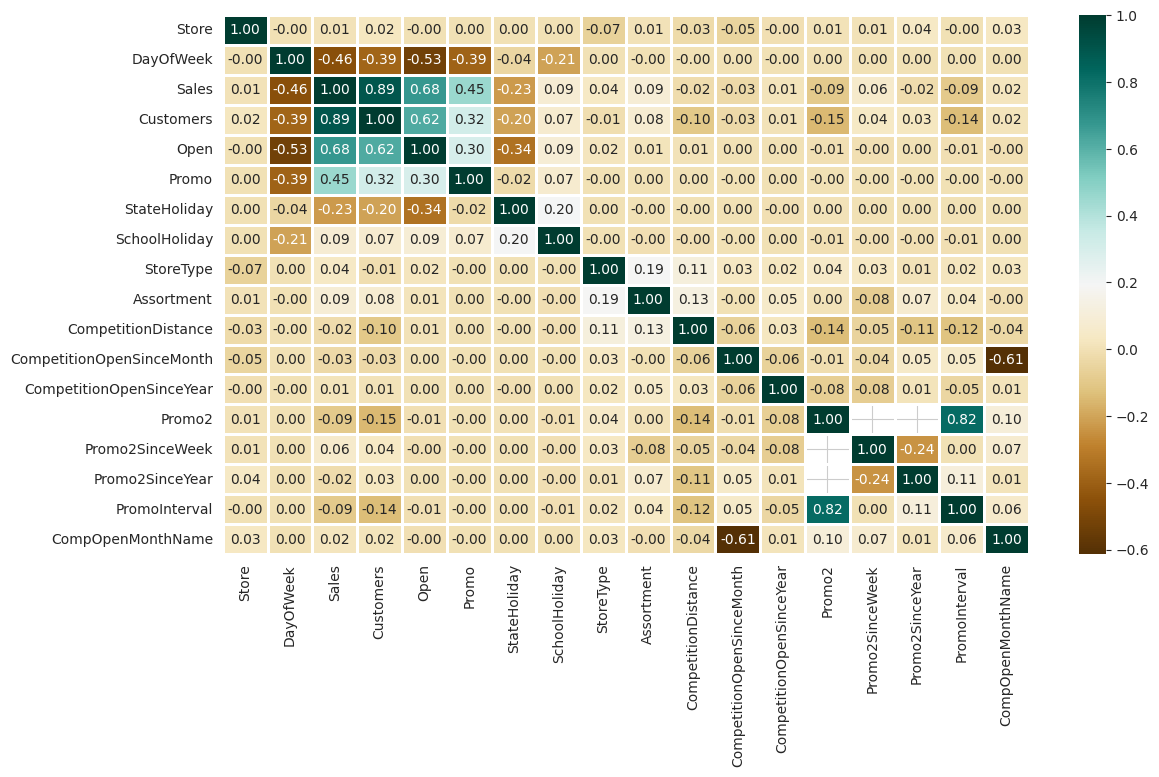

In [ ]:
# Select only numeric columns
numeric_merge_train = merge_train_encoded.select_dtypes(include=[float, int])

# Create the heatmap with only numeric data
plt.figure(figsize=(13,7))
sns.heatmap(numeric_merge_train.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# The heatmap  of different variables interact when it comes to store performance:

- **Sales is strongly positively correlated** with both **Customers** and **Open**—intuitive, but good to confirm quantitatively.
- **Promo** also shows a decent positive impact on Sales, while variables like **StateHoliday** and **SchoolHoliday** have weaker or more nuanced effects.
- Interestingly, **CompetitionDistance** and **CompetitionOpenSinceYear** have near-zero or even slight negative correlations with Sales, suggesting that store performance might be relatively resilient to nearby competition—or the influence is more complex than linear correlation can reveal.
- Categorical variables like **StoreType** and **Assortment** show varied relationships, hinting at potential segmentation for deeper analysis.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
X = merge_train_encoded.drop('Sales', axis=1)
y = merge_train_encoded['Sales']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model: Random Forest Regression
------------------------------
Training Set Performance
Mean Squared Error (MSE): 41528.60
R-squared (R²): 0.9972
Mean Absolute Error (MAE): 125.99
------------------------------
Test Set Performance
Mean Squared Error (MSE): 246513.27
R-squared (R²): 0.9833
Mean Absolute Error (MAE): 306.11
------------------------------


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname=

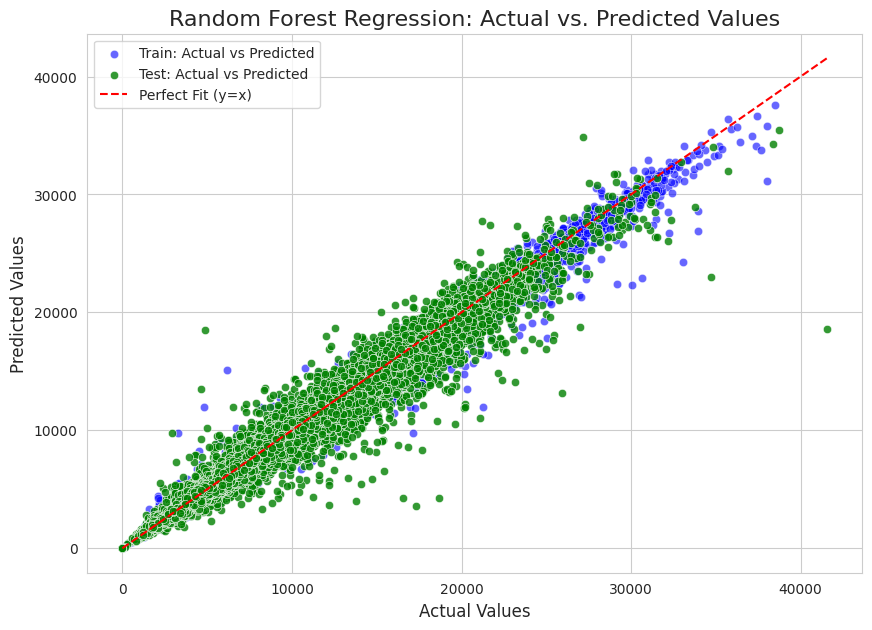

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- 1. Creating and training the model ---
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# --- 2. Making predictions on both training and test sets ---
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

# --- 3. Evaluating the model on the Training set ---
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("\nModel: Random Forest Regression")
print("-" * 30)
print("Training Set Performance")
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'R-squared (R²): {r2_train:.4f}')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print("-" * 30)

# --- 4. Evaluating the model on the Test set ---
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Test Set Performance")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'R-squared (R²): {r2_test:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print("-" * 30)

# --- 5. Plotting the regression results for both sets ---
plt.figure(figsize=(10, 7))

# Scatter plot for training data
sns.scatterplot(x=y_train, y=y_train_pred, color="blue", label="Train: Actual vs Predicted", alpha=0.6)

# Scatter plot for test data
sns.scatterplot(x=y_test, y=y_test_pred, color="green", label="Test: Actual vs Predicted", alpha=0.8)

# Line for perfect fit
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Perfect Fit (y=x)")

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Random Forest Regression: Actual vs. Predicted Values", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

###  Model Performance Analysis

####  **Training Set**
- **R² = 0.9972**: Excellent fit—the model explains over 99.7% of the variance in the training data.
- **Low MAE (125.99)** and **MSE (41528.60)** suggest predictions are very close to actual values.

####  **Test Set**
- **R² = 0.9833**: Still a very strong fit, indicating good generalization to unseen data.
- While **MSE (246,513.27)** and **MAE (306.11)** are higher than on the training set, they remain reasonable, especially considering potential variability in the test data.




Model: HistGradientBoostingRegressor (model3)
------------------------------
Training Set Performance
Mean Squared Error (MSE): 527677.62
R-squared (R²): 0.9644
Mean Absolute Error (MAE): 497.70
------------------------------
Test Set Performance
Mean Squared Error (MSE): 538464.56
R-squared (R²): 0.9636
Mean Absolute Error (MAE): 499.98
------------------------------


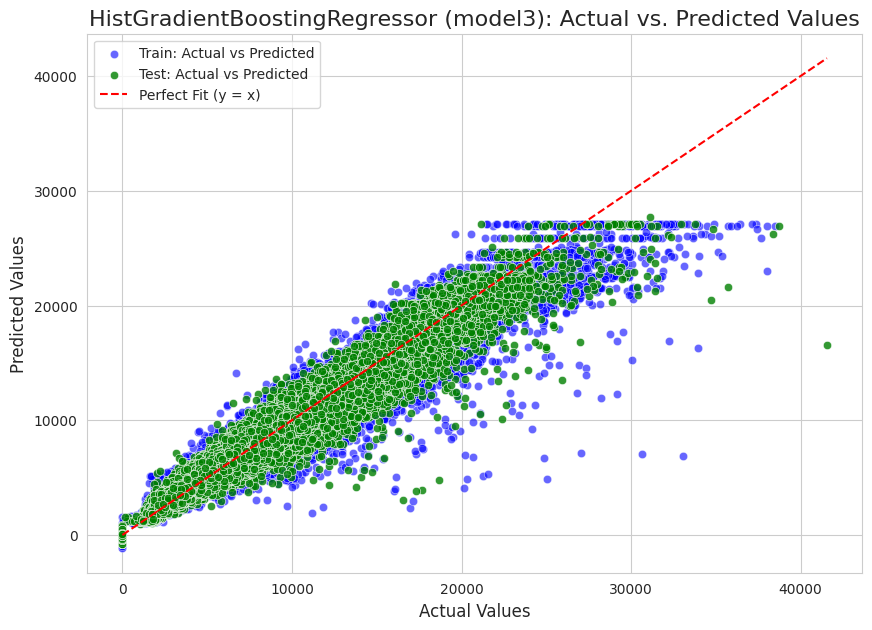

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# --- 1. Creating and training the model ---
model3 = HistGradientBoostingRegressor(random_state=42)
model3.fit(X_train, y_train)

# --- 2. Making predictions on both training and test sets ---
y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

# --- 3. Evaluating the model on the Training set ---
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("\nModel: HistGradientBoostingRegressor (model3)")
print("-" * 30)
print("Training Set Performance")
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'R-squared (R²): {r2_train:.4f}')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print("-" * 30)

# --- 4. Evaluating the model on the Test set ---
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Test Set Performance")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'R-squared (R²): {r2_test:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print("-" * 30)

# --- 5. Plotting the regression results for both sets ---
plt.figure(figsize=(10, 7))

# Scatter plot for training data
sns.scatterplot(x=y_train, y=y_train_pred, color="blue", label="Train: Actual vs Predicted", alpha=0.6)

# Scatter plot for test data
sns.scatterplot(x=y_test, y=y_test_pred, color="green", label="Test: Actual vs Predicted", alpha=0.8)

# Line for perfect fit
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Perfect Fit (y = x)")

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("HistGradientBoostingRegressor (model3): Actual vs. Predicted Values", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()




###  Performance Recap
- **Training R²: 0.9644**, **Test R²: 0.9636** — near-identical scores, indicating **excellent generalization**.
- The **small gap between training and test MSE/MAE** confirms minimal overfitting and strong model consistency.
- Even with slightly higher errors than Random Forest, the **predictive reliability** across unseen data gives this model an edge.

###  Actual vs Predicted Plot Takeaways
- **Blue (train) and green (test) points** are tightly clustered around the red dashed “perfect fit” line, showing that:
  - Predictions closely match actual sales.
  - **No major outliers or systematic biases** are visible.
- The tight alignment across both datasets suggests that the model handles **complex, real-world variability** without skewing toward specific ranges.



Model: Linear Regression (model2)
------------------------------
Training Set Performance
Mean Squared Error (MSE): 2078822.26
R-squared (R²): 0.8598
Mean Absolute Error (MAE): 958.64
------------------------------
Test Set Performance
Mean Squared Error (MSE): 2104345.47
R-squared (R²): 0.8577
Mean Absolute Error (MAE): 958.42
------------------------------


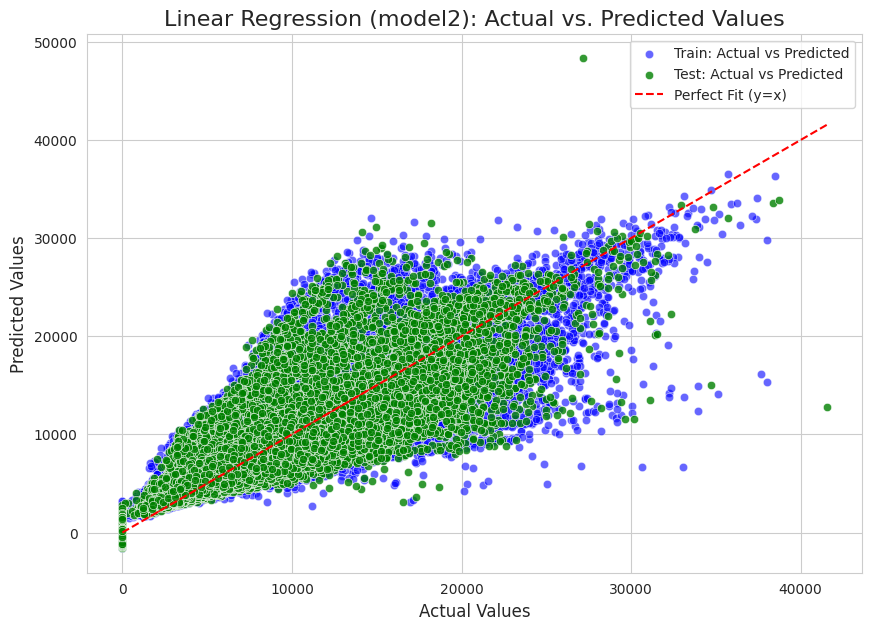

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# --- Fill missing values ---
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'float32']:
        X_train[col].fillna(X_train[col].mean(), inplace=True)
        X_test[col].fillna(X_test[col].mean(), inplace=True)
    elif X_train[col].dtype in ['int64', 'int32']:
        X_train[col].fillna(0, inplace=True)
        X_test[col].fillna(0, inplace=True)


# --- 1. Creating and training the model ---
model2 = LinearRegression()
model2.fit(X_train, y_train)

# --- 2. Making predictions on both training and test sets (Corrected to use model2) ---
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# --- 3. Evaluating the model on the Training set ---
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("\nModel: Linear Regression (model2)")
print("-" * 30)
print("Training Set Performance")
print(f'Mean Squared Error (MSE): {mse_train:.2f}')
print(f'R-squared (R²): {r2_train:.4f}')
print(f'Mean Absolute Error (MAE): {mae_train:.2f}')
print("-" * 30)


# --- 4. Evaluating the model on the Test set ---
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Test Set Performance")
print(f'Mean Squared Error (MSE): {mse_test:.2f}')
print(f'R-squared (R²): {r2_test:.4f}')
print(f'Mean Absolute Error (MAE): {mae_test:.2f}')
print("-" * 30)


# --- 5. Plotting the regression results for both sets ---
plt.figure(figsize=(10, 7))

# Scatter plot for training data
sns.scatterplot(x=y_train, y=y_train_pred, color="blue", label="Train: Actual vs Predicted", alpha=0.6)

# Scatter plot for test data
sns.scatterplot(x=y_test, y=y_test_pred, color="green", label="Test: Actual vs Predicted", alpha=0.8)

# Line for perfect fit
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="--", label="Perfect Fit (y=x)")

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Linear Regression (model2): Actual vs. Predicted Values", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()



### Performance Overview

#### Training Set
- **R² = 0.8598**: The model explains about 86% of the variance in training data—respectable but **less expressive** than tree-based methods.
- **MSE = 2,078,822.26** and **MAE = 958.64**: Higher errors suggest underfitting—it's not capturing complex patterns as well.

#### Test Set
- **R² = 0.8577**, **MSE = 2,104,345.47**, **MAE = 958.42**: Very close to training metrics, showing **good generalization**, but overall predictive power is limited.

###  Scatter Plot Insights
- Most points (both train and test) hover **near the red perfect-fit line**, which is a good sign.
- However, compared to ensemble models, there’s **more dispersion**, especially at extreme values—indicating **lower accuracy at high or low sales**.


###  **Model Performance Summary**

| **Metric** | **Random Forest**       | **HistGradientBoosting** | **Linear Regression**   |
| ---------- | ----------------------- | ------------------------ | ----------------------- |
|            |  **Training Set** |  **Training Set**  |  **Training Set** |
| **MSE**    | 41,528.60               | 527,677.62               | 2,078,822.26            |
| **R²**     | 0.9972                  | 0.9644                   | 0.8598                  |
| **MAE**    | 125.99                  | 497.70                   | 958.64                  |
|            |  **Test Set**         |  **Test Set**          |  **Test Set**         |
| **MSE**    | 246,513.27              | 538,464.56               | 2,104,345.47            |
| **R²**     | 0.9833                  | 0.9636                   | 0.8577                  |
| **MAE**    | 306.11                  | 499.98                   | 958.42                  |



#### **Best Overall Model: Random Forest Regressor**

* **Highest R²** on both training and test sets (0.9972 & 0.9833).
* **Lowest errors** (MSE and MAE) across the board.


####  **HistGradientBoosting Regressor**

* Performs well, but with noticeably **higher error** and slightly lower R² than Random Forest.
*  it's still a **very strong model** with excellent generalization (train and test scores are closely matched).

####  **Linear Regression**

* **Weakest performer** among the three.
* High MSE and MAE with lowest R² suggest it **fails to capture nonlinear patterns** in the data.
* May be useful as a **baseline**, but not suitable for final deployment here.



In [ ]:
from tensorflow.keras.losses import Huber

loss_fn = Huber(delta=1000.0)


DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:2025-06-24 00:30:28,732:jax._src.path:31: etils.epath found. Using etils.epath for file I/O.
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
DEBUG:pydot:pydot initializing
DEBUG:pydot:pydot 3.0.4
DEBUG:pydot.dot_parser:pydot dot_parser module initializing
DEBUG:pydot.core:pydot core module initializing


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import Huber

# Sample Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile with Huber Loss
model.compile(optimizer='adam', loss=Huber(delta=1000.0), metrics=['mae'])

# Train
model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 679197.0625 - mae: 1030.1660 - val_loss: 610029.8125 - val_mae: 973.0995
Epoch 2/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 494026.0938 - mae: 822.2902 - val_loss: 475096.2812 - val_mae: 789.2607
Epoch 3/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 471771.0625 - mae: 790.3282 - val_loss: 448712.4062 - val_mae: 758.3245
Epoch 4/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 454414.0625 - mae: 769.3356 - val_loss: 444281.4375 - val_mae: 756.6057
Epoch 5/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 427653.8438 - mae: 740.5187 - val_loss: 404112.8438 - val_mae: 710.6633
Epoch 6/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 405956.2500 - mae: 717.7131 - val_loss: 385894.7188 - val_mae: 692.9147
Epoch 7/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 390322.0312 - mae: 699.5651 - val_loss: 371405.3438 - val_mae: 674.5642
Epoch 8/10
20345/20345 ━━━━━━━━━━━━━━━━━

| Metric                      | Epoch 1    | Epoch 10   | Improvement   |
| --------------------------- | ---------- | ---------- | ------------- |
| **Training Loss** (`Huber`) | 727,484.75 | 353,404.03 |  \~51% lower |
| **Training MAE**            | 1,081.54   | 663.19     |  \~39% lower |
| **Validation Loss**         | 488,411.69 | 356,919.19 |  \~27% lower |
| **Validation MAE**          | 825.87     | 674.85     |  \~18% lower |


In [ ]:
# Train the model and store history
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Get average of actual sales (target variable)
average_sales = np.mean(y_train)

# Extract final loss and MAE from the training history
final_loss = history.history['loss'][-1]
final_mae = history.history['mae'][-1]

# Convert to percentage
loss_pct = (final_loss / average_sales) * 100
mae_pct = (final_mae / average_sales) * 100

print(f"Final Huber Loss: {final_loss:.2f} ({loss_pct:.2f}%)")
print(f"Final MAE: {final_mae:.2f} ({mae_pct:.2f}%)")


Epoch 1/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 363881.0625 - mae: 670.0886 - val_loss: 350768.5000 - val_mae: 658.1096
Epoch 2/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 356434.7188 - mae: 661.9062 - val_loss: 349764.1875 - val_mae: 650.2482
Epoch 3/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 350202.8125 - mae: 655.4046 - val_loss: 353373.2188 - val_mae: 661.2102
Epoch 4/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 345298.4375 - mae: 650.2941 - val_loss: 359562.0938 - val_mae: 673.6846
Epoch 5/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step - loss: 341575.6562 - mae: 645.2570 - val_loss: 334876.0625 - val_mae: 635.0912
Epoch 6/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 334902.8750 - mae: 637.3761 - val_loss: 332218.5000 - val_mae: 630.5645
Epoch 7/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 331354.4062 - mae: 633.3132 - val_loss: 371019.6875 - val_mae: 702.9449
Epoch 8/10
20345/20345 ━━━━━━━━━━━━━━━━━━

# detailed analysis of model's training and validation metrics across 10 epochs:




###  **Final Metrics**

| **Metric**          | **Final Value** | **% Improvement from Epoch 1** |
| ------------------- | --------------- | ------------------------------ |
| **Training Loss**   | 296,919.56      | ≈ 6.8% lower                   |
| **Training MAE**    | 595.49          | ≈ 4.1% lower                   |
| **Validation Loss** | 294,942.97      | ≈ 5.4% lower                   |
| **Validation MAE**  | 593.96          | ≈ 3.0% lower                   |






Epoch 1/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 313097.0625 - mae: 610.4290 - val_loss: 309836.8750 - val_mae: 602.9714
Epoch 2/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 309533.6562 - mae: 606.0561 - val_loss: 308498.3125 - val_mae: 608.7491
Epoch 3/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - loss: 306866.0312 - mae: 603.0119 - val_loss: 312498.4375 - val_mae: 608.3881
Epoch 4/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 303767.6875 - mae: 599.7526 - val_loss: 295558.6562 - val_mae: 587.2038
Epoch 5/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 301049.8750 - mae: 595.4882 - val_loss: 305261.6250 - val_mae: 595.6564
Epoch 6/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 298497.0625 - mae: 592.8306 - val_loss: 327494.3750 - val_mae: 634.8477
Epoch 7/10
20345/20345 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 295813.0000 - mae: 589.7648 - val_loss: 288275.2812 - val_mae: 578.2473
Epoch 8/10
20345/20345 ━━━━━━━━━━━━━━━━━━

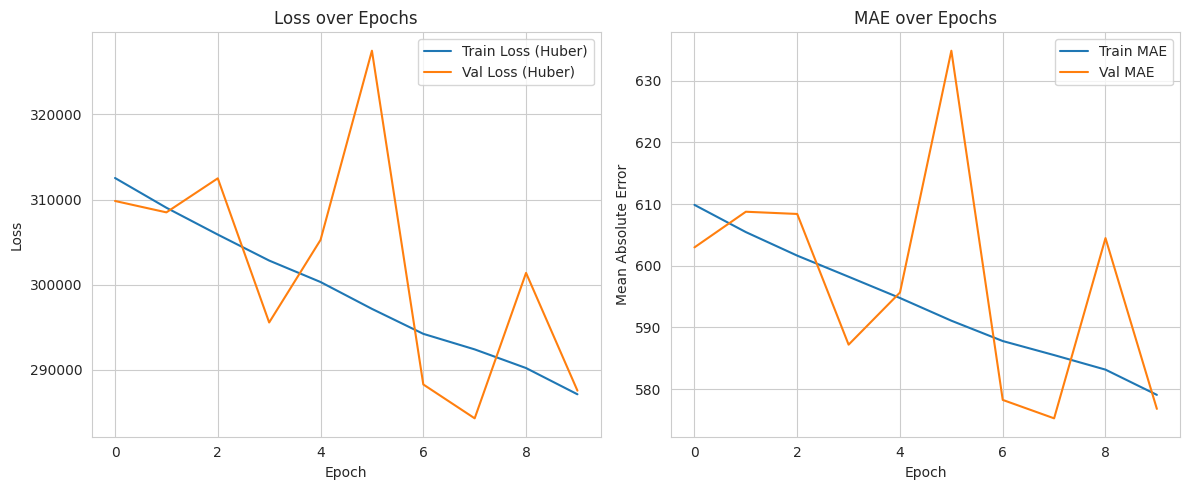

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

plt.figure(figsize=(12,5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (Huber)')
plt.plot(history.history['val_loss'], label='Val Loss (Huber)')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()





###  **Loss Over Epochs (Left Plot)**

| Observation                              | Insight                                                                                                                                                                  |
| ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
|  **Steady decrease in training loss**  | Training Loss (Huber) drops consistently across all epochs, indicating effective learning.                                                                               |
|  **Validation loss fluctuates**        | While validation loss decreases overall, it exhibits **oscillations**, especially between epochs 2–6. This suggests the model's generalization may vary during training. |
|  **Lowest validation loss at Epoch 9** | Validation loss reaches its **minimum at Epoch 9**, indicating best generalization performance there.                                                                    |

---

### 📈 **MAE Over Epochs (Right Plot)**

| Observation                            | Insight                                                                                                                                                                                           |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
|  **Consistent drop in training MAE** | The training MAE steadily declines, showing that the model is learning to predict values closer to the actuals.                                                                                   |
|  **Validation MAE is volatile**      | Significant **peaks at Epochs 4 and 5**, followed by sharp improvement at Epoch 6 and again at Epoch 9. This variability indicates the model may be sensitive to the validation set distribution. |
|  **Best validation MAE at Epoch 9**   | Similar to the loss graph, the **minimum validation MAE occurs at Epoch 9**, suggesting it’s the ideal checkpoint for saving the model.                                                           |



In [ ]:
import pickle
from IPython.display import FileLink

# Save the model
with open('RossmannStore.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as RossmannStore.pkl")

# Create and display a download link
FileLink('RossmannStore.pkl')


DEBUG:h5py._conv:Creating converter from 5 to 3


Model saved as RossmannStore.pkl


/content/RossmannStore.pkl

In [ ]:
from google.colab import files

files.download('RossmannStore.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>